<a href="https://colab.research.google.com/github/loveneeshdhir/Machine-Learning/blob/master/calcofi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [0]:
#from google.colab import files
#uploaded = files.upload()

Saving bottle.csv to bottle.csv


In [0]:
#Let's read the data from the file
import io
df = pd.read_csv(io.BytesIO(uploaded['bottle.csv']))

df = pd.DataFrame(df)
df.shape

(864863, 74)

In [0]:
#As we can see, the data has myriad rows
#So to reduce the number of rows for our model, we'll use 10% of them
df = df.sample(frac=0.1, random_state = 123)

In [0]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
253342,9726,253343,080.0 080.0,19-5805ST-HY-130-0612-08000800-0028A-3,28,14.44,33.170,5.93,24.683,101.9,258.45440,NaN,3,2.0,NaN,2.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,28.0,14.44,14.44,33.170,24.680,325.8,0.090,5.93,101.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819429,32644,819430,090.0 080.0,20-1101NM-MX-018-0152-09000800-0500A-7,500,5.59,34.199,0.53,26.976,7.5,23.04805,NaN,7,2.0,6.0,3.0,6.0,9.0,6.0,NaN,NaN,NaN,9.0,NaN,9.0,3.07,NaN,80.6,NaN,0.0,NaN,40.7,NaN,0.0,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,500.0,5.59,5.55,34.199,26.976,113.6,1.000,0.53,7.5,80.6,3.07,40.7,0.0,0.0,NaN,NaN,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37319,1206,37320,093.3 060.0,19-5003PT-HY-076-1530-09330600-0500A-7,500,5.76,34.300,0.96,27.035,13.7,41.74502,NaN,7,2.0,NaN,3.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,3.32,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,500.0,5.76,5.72,34.300,27.030,108.3,0.830,0.96,13.7,NaN,3.32,NaN,NaN,NaN,NaN,NaN,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
792607,31626,792608,076.7 055.0,20-0801JD-MX-029-0822-07670550-0200A-7,200,8.61,34.151,1.38,26.517,21.1,60.03875,NaN,7,2.0,6.0,3.0,6.0,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,2.48,NaN,40.6,NaN,0.0,NaN,31.3,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,200.0,8.61,8.59,34.151,26.518,154.4,0.421,1.38,21.1,40.6,2.48,31.3,0.0,NaN,NaN,NaN,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390577,14666,390578,120.0 045.0,19-6601AX-HY-029-2106-12000450-0150A-7,150,11.18,34.193,2.18,26.118,35.2,94.88071,NaN,7,2.0,NaN,3.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,150.0,11.18,11.16,34.193,26.110,192.1,0.400,2.18,35.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Now that those rows are reduced we see that there are a lot of entries with NaN values

#print(df[df.columns[0]].dtype)
#df.dtypes

#Let's try removing them
df.dropna()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment


In [0]:
df.isnull().sum()

Cst_Cnt                    0
Btl_Cnt                    0
Sta_ID                     0
Depth_ID                   0
Depthm                     0
T_degC                  1091
Salnty                  4767
O2ml_L                 16910
STheta                  5287
O2Sat                  20499
Oxy_µmol/Kg            20500
BtlNum                 74680
RecInd                     0
T_prec                  1091
T_qual                 84200
S_prec                  4767
S_qual                 78944
P_qual                 19151
O_qual                 67927
SThtaq                 79862
O2Satq                 64530
ChlorA                 63877
Chlqua                 22653
Phaeop                 63877
Phaqua                 22653
PO4uM                  45248
PO4q                   41210
SiO3uM                 51091
SiO3qu                 35383
NO2uM                  52668
                       ...  
MeanAs                 84191
MeanAp                 84436
MeanAq                  2458
IncTim        

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86486 entries, 253342 to 145501
Data columns (total 74 columns):
Cst_Cnt                86486 non-null int64
Btl_Cnt                86486 non-null int64
Sta_ID                 86486 non-null object
Depth_ID               86486 non-null object
Depthm                 86486 non-null int64
T_degC                 85395 non-null float64
Salnty                 81719 non-null float64
O2ml_L                 69576 non-null float64
STheta                 81199 non-null float64
O2Sat                  65987 non-null float64
Oxy_µmol/Kg            65986 non-null float64
BtlNum                 11806 non-null float64
RecInd                 86486 non-null int64
T_prec                 85395 non-null float64
T_qual                 2286 non-null float64
S_prec                 81719 non-null float64
S_qual                 7542 non-null float64
P_qual                 67335 non-null float64
O_qual                 18559 non-null float64
SThtaq                 

In [0]:
#What!!!!? Every row from our randomly selected 10% data has atleast 1 NaN value

#df.fillna(value=0, inplace=True)

#We need a better approach than substituting every entry with 0
#Let's first remove the columns with "object" 
temp_df=df
for i in temp_df.columns:
    if(df[i].dtype=='object'):
        del df[i]
    
df.shape

(86486, 70)

In [0]:
#As we can see we are now left with 70 columns 

#print(len(df.columns))

#Now, let's replace them with the mean value of their respective columns
for i in df.columns:
    df[i].fillna((df[i].mean()),inplace=True)
    
#print(df[df.columns[0]])

In [0]:
df.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
253342,9726,253343,28,14.44,33.170,5.93,24.683,101.9,258.45440,10.489243,3,2.0,7.471129,2.0,7.941262,9.0,8.750364,8.453955,8.791173,0.447039,9.0,0.195598,9.0,1.56514,9.000000,26.731073,9.000000,0.041911,9.000000,17.298054,9.000000,0.078426,9.000000,8.40761,1.271937,9.0,8.332168,1.269627,9.0,0.15086,1.994146,9.0,7.160871,1.262927,9.0,18.679613,28.0,14.44,14.44,33.170,24.680,325.8,0.090,5.93,101.9,26.730806,1.565109,17.297727,0.041933,0.078397,0.447076,0.195642,28,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642
819429,32644,819430,500,5.59,34.199,0.53,26.976,7.5,23.04805,10.489243,7,2.0,6.000000,3.0,6.000000,9.0,6.000000,8.453955,8.791173,0.447039,9.0,0.195598,9.0,3.07000,8.999315,80.600000,8.999706,0.000000,8.995123,40.700000,8.993126,0.000000,8.944824,8.40761,1.271937,9.0,8.332168,1.269627,9.0,0.15086,1.994146,9.0,7.160871,1.262927,9.0,18.679613,500.0,5.59,5.55,34.199,26.976,113.6,1.000,0.53,7.5,80.600000,3.070000,40.700000,0.000000,0.000000,0.447076,0.195642,503,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642
37319,1206,37320,500,5.76,34.300,0.96,27.035,13.7,41.74502,10.489243,7,2.0,7.471129,3.0,7.941262,9.0,8.750364,8.453955,8.791173,0.447039,9.0,0.195598,9.0,3.32000,8.999315,26.731073,9.000000,0.041911,9.000000,17.298054,9.000000,0.078426,9.000000,8.40761,1.271937,9.0,8.332168,1.269627,9.0,0.15086,1.994146,9.0,7.160871,1.262927,9.0,18.679613,500.0,5.76,5.72,34.300,27.030,108.3,0.830,0.96,13.7,26.730806,3.320000,17.297727,0.041933,0.078397,0.447076,0.195642,503,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642
792607,31626,792608,200,8.61,34.151,1.38,26.517,21.1,60.03875,10.489243,7,2.0,6.000000,3.0,6.000000,9.0,8.750364,8.453955,8.791173,0.447039,9.0,0.195598,9.0,2.48000,8.999315,40.600000,8.999706,0.000000,8.995123,31.300000,8.993126,0.078426,9.000000,8.40761,1.271937,9.0,8.332168,1.269627,9.0,0.15086,1.994146,9.0,7.160871,1.262927,9.0,18.679613,200.0,8.61,8.59,34.151,26.518,154.4,0.421,1.38,21.1,40.600000,2.480000,31.300000,0.000000,0.078397,0.447076,0.195642,201,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642
390577,14666,390578,150,11.18,34.193,2.18,26.118,35.2,94.88071,10.489243,7,2.0,7.471129,3.0,7.941262,9.0,8.750364,8.453955,8.791173,0.447039,9.0,0.195598,9.0,1.56514,9.000000,26.731073,9.000000,0.041911,9.000000,17.298054,9.000000,0.078426,9.000000,8.40761,1.271937,9.0,8.332168,1.269627,9.0,0.15086,1.994146,9.0,7.160871,1.262927,9.0,18.679613,150.0,11.18,11.16,34.193,26.110,192.1,0.400,2.18,35.2,26.730806,1.565109,17.297727,0.041933,0.078397,0.447076,0.195642,151,161.179432,2147.873298,2143.434977,2254.50086,2272.112609,7.95765,7.950642


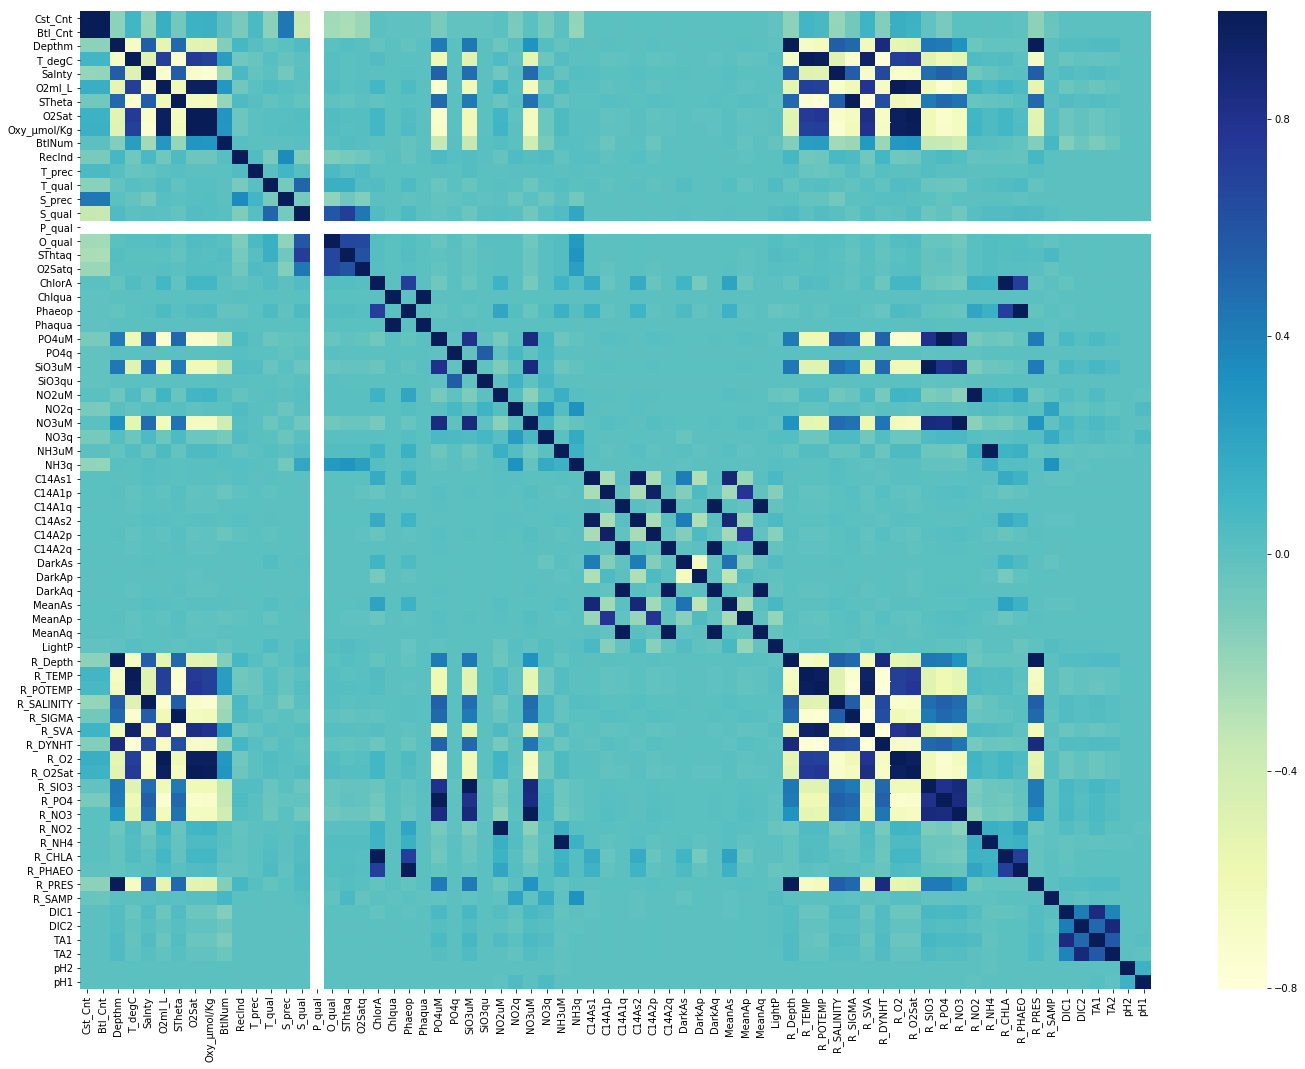

In [0]:
#Boom, all NaN values replaced with mean values

#Plotting a Heatmap now, yes a heatmap for 70 features 
import seaborn as sns
cor = df.corr()
fig = plt.figure(figsize = (24, 18))

#Plotting the heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

In [0]:
#Since we are predicting Salinity of water, let's select the columns which show correlation 
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual',
       'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA',
       'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu',
       'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p',
       'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq',
       'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [0]:
#Selecting the target and feature variables
target='Salnty'
features =['Depthm', 'T_degC','O2ml_L', 'STheta','O2Sat', 'Oxy_µmol/Kg','PO4uM', 'SiO3uM','NH3uM','R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat','R_SIO3', 'R_PO4', 'R_NO3','R_PRES']


In [0]:
x=df[features]
y=df[target]
print(x.shape,y.shape)

(86486, 22) (86486,)


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(x)
y = np.asarray(y).reshape(-1,1)

In [0]:
y[:10]

array([[33.17 ],
       [34.199],
       [34.3  ],
       [34.151],
       [34.193],
       [33.68 ],
       [33.784],
       [34.537],
       [34.018],
       [34.276]])

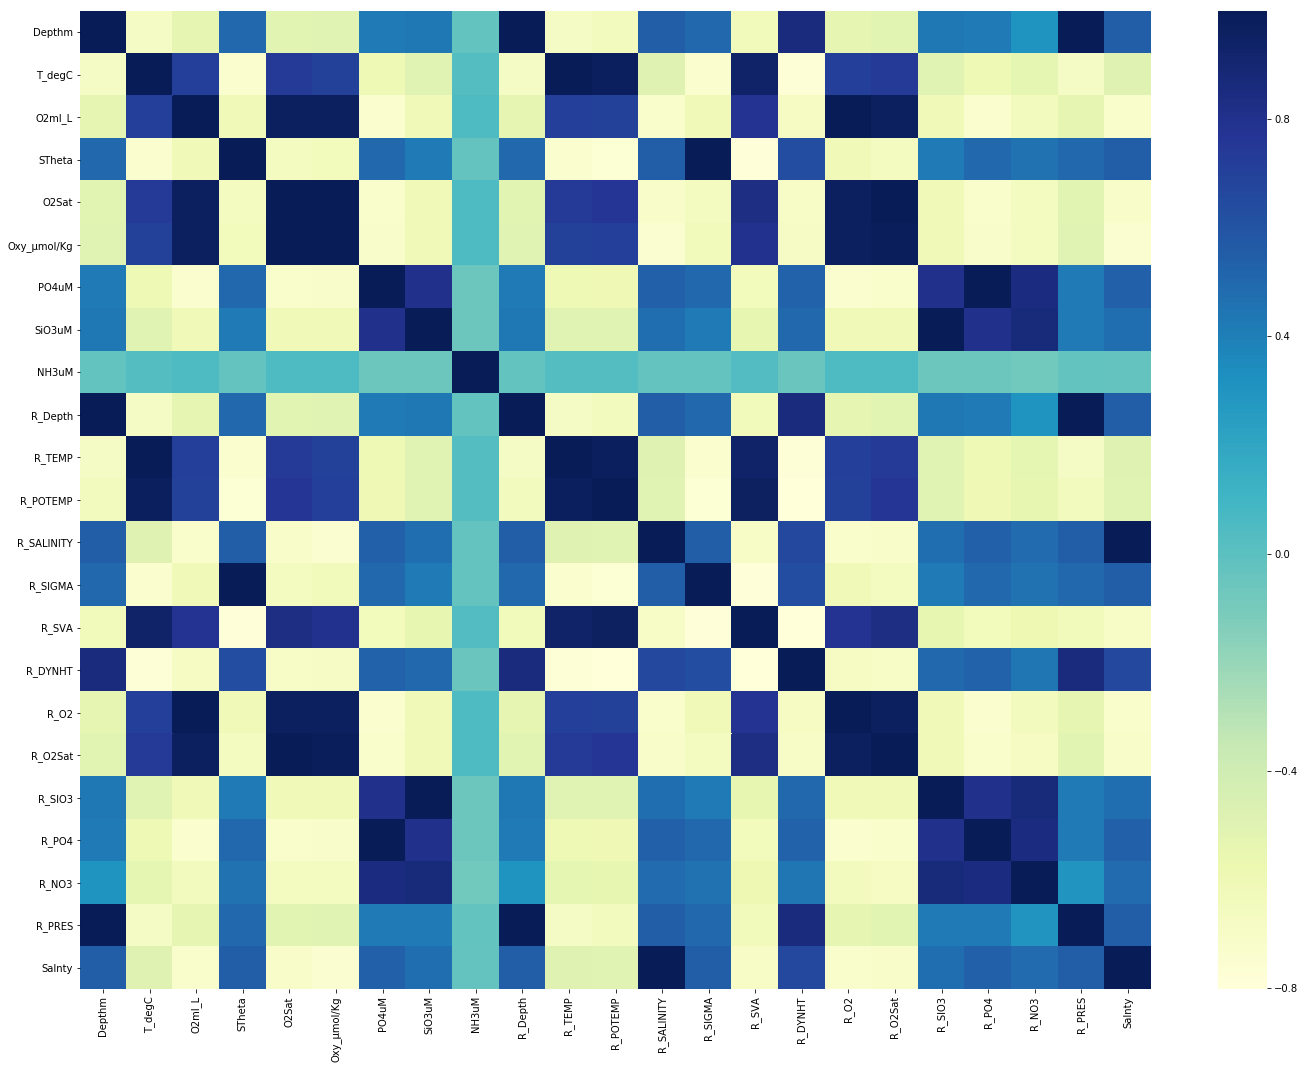

In [0]:
cor = df[features+[target]].corr()
fig = plt.figure(figsize = (24, 18))

#Plotting the heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

In [0]:
#Splitting them into test and training set with a 3:1 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print(x_train.shape,y_train.shape)

(64864, 22) (64864, 1)


In [0]:
#Hello Linear Regression!
clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy*100)


99.99992322780446


In [0]:
clf.score?

In [0]:
#Over 99.99% accuracy, I wonder if I made any mistake or it's just great :)

# Make predictions using the new model
y_pred = clf.predict(x_test)
for i in range(10):
    print('Actual value: {:.3f} Predicted Value: {:.3f}'.format(y_test[i][0],y_pred[i][0]))


Actual value: 33.447 Predicted Value: 33.447
Actual value: 34.047 Predicted Value: 34.047
Actual value: 33.400 Predicted Value: 33.400
Actual value: 34.070 Predicted Value: 34.070
Actual value: 34.313 Predicted Value: 34.313
Actual value: 35.230 Predicted Value: 35.230
Actual value: 34.136 Predicted Value: 34.136
Actual value: 33.710 Predicted Value: 33.710
Actual value: 33.877 Predicted Value: 33.877
Actual value: 33.530 Predicted Value: 33.530


In [0]:
#As expected, the actual and the predicted values are almost same

#Let's make an interactive visualization of predicted and actual values
trace=go.Scatter(x=y_test.reshape(21622), y=y_pred.reshape(21622),marker=dict(color='red'))

In [0]:
go.Scatter?

In [0]:
layout = go.Layout(
    title=go.layout.Title(
        text='Predicted Vs Actual Salinity ',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Actual Values',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Predicted Values',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

fig = go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='results')

In [0]:
for i in features:
    x=np.asarray(df[i]).reshape(-1,1)
    y=df[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    clf = LinearRegression()
    clf.fit(x_train, y_train)
    accuracy = clf.score(x_test, y_test)
    print(i,accuracy*100)
    



Depthm 29.91681624376725
T_degC 24.17032670024206
O2ml_L 52.68949630530268
STheta 38.696547026308636
O2Sat 49.78020678621086
Oxy_µmol/Kg 54.75470643893578
PO4uM 29.061265449411845
SiO3uM 22.637090584167353
NH3uM 0.09018532421798398
R_Depth 28.846074826004585
R_TEMP 24.758605743828976
R_POTEMP 25.168717428008712
R_SALINITY 99.999929856967
R_SIGMA -70.31341917674713
R_SVA 49.40895997499663
R_DYNHT 44.35185258279761
R_O2 52.01305185086302
R_O2Sat 49.54484402523385
R_SIO3 23.01821551485206
R_PO4 29.512583503749866
R_NO3 23.522625524639974
R_PRES 28.78306837419975
